# 개인 정리 내용

## 라이브러리 세팅하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rc('font', family='AppleGothic')

## 데이터 불러오기

In [3]:
data = pd.read_csv('KOBIS.csv') # 데이터 읽어 오기 
data.head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26197 entries, 0 to 26196
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       26197 non-null  int64 
 1   Movie_Name               26197 non-null  object
 2   Director                 24690 non-null  object
 3   Production_Company       11179 non-null  object
 4   Import_Company           15646 non-null  object
 5   Distributing_Agency      19546 non-null  object
 6   Release_Date             26176 non-null  object
 7   Movie_Type               26197 non-null  object
 8   Movie_Form               26178 non-null  object
 9   Nationality              26186 non-null  object
 10  National_number_screens  26197 non-null  object
 11  National_Sales           25141 non-null  object
 12  National_Audience        26197 non-null  object
 13  Seoul_Sales              25135 non-null  object
 14  Seoul_Audience           26197 non-nul

## 전처리

### 년도와 수익금과 장르를 사용해서 시각화!
- lineplot

In [5]:
a, b = [1, 2], [3, 4]
a[0] + b[0]
a[0] = a[0] + b[0]
a

[4, 2]

In [6]:
data

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,26193,T-34,알렉세이 시도로프,NaN,㈜코리아스크린,㈜코리아스크린,2019-06-27,개봉영화,장편,러시아,1,"5,000",1,0,0,전쟁,12세이상관람가,독립/예술영화
26193,26194,V/H/S/2: 악마를 부르는 비디오,"가렛 에반스,아담 윈가드,에두아르도 산체스,그렉 헤일",NaN,(주)노이에스,(주)노이에스,2013-08-14,개봉영화,장편,미국,1,"300,000",75,0,0,공포(호러),청소년관람불가,일반영화
26194,26195,VIP전용 여자,카네다 사토시,NaN,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2016-12-01,개봉영화,장편,일본,1,"8,000",1,0,0,성인물(에로),청소년관람불가,일반영화
26195,26196,VJ의 은밀한 사생활,오카다 히로,NaN,(주)영진크리에이티브,(주)영진크리에이티브,2017-12-25,개봉영화,장편,일본,1,"6,000",1,0,0,멜로/로맨스,청소년관람불가,일반영화


In [7]:

# data = pd.to_datetime(data['Release_Date'], format = "%Y-%m-%d")
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format = "%Y-%m-%d")

data.head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화


In [8]:
# num_columns = ['Release_Date']
# data[num_columns] = data[num_columns].fillna('0000-00-00')
# data[num_columns].isna().sum()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26197 entries, 0 to 26196
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       26197 non-null  int64         
 1   Movie_Name               26197 non-null  object        
 2   Director                 24690 non-null  object        
 3   Production_Company       11179 non-null  object        
 4   Import_Company           15646 non-null  object        
 5   Distributing_Agency      19546 non-null  object        
 6   Release_Date             26176 non-null  datetime64[ns]
 7   Movie_Type               26197 non-null  object        
 8   Movie_Form               26178 non-null  object        
 9   Nationality              26186 non-null  object        
 10  National_number_screens  26197 non-null  object        
 11  National_Sales           25141 non-null  object        
 12  National_Audience        26197 n

In [10]:
# 연도 뽑아오기 
import datetime
data['Release_Date'].dt.year
data['year'] = data['Release_Date'].dt.year


In [11]:
data['Release_Date'].dt.month
data['month'] = data['Release_Date'].dt.month

In [12]:
data['Release_Date'].dt.day
data['day'] = data['Release_Date'].dt.day

In [13]:
num_columns = ['year']
data[num_columns] = data[num_columns].fillna(0)
data[num_columns].isna().sum()

year    0
dtype: int64

In [14]:
num_columns = ['month']
data[num_columns] = data[num_columns].fillna(0)
data[num_columns].isna().sum()

month    0
dtype: int64

In [15]:
num_columns = ['day']
data[num_columns] = data[num_columns].fillna(0)
data[num_columns].isna().sum()

day    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26197 entries, 0 to 26196
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       26197 non-null  int64         
 1   Movie_Name               26197 non-null  object        
 2   Director                 24690 non-null  object        
 3   Production_Company       11179 non-null  object        
 4   Import_Company           15646 non-null  object        
 5   Distributing_Agency      19546 non-null  object        
 6   Release_Date             26176 non-null  datetime64[ns]
 7   Movie_Type               26197 non-null  object        
 8   Movie_Form               26178 non-null  object        
 9   Nationality              26186 non-null  object        
 10  National_number_screens  26197 non-null  object        
 11  National_Sales           25141 non-null  object        
 12  National_Audience        26197 n

In [17]:
str([1,2,3,4])

'[1, 2, 3, 4]'

In [18]:
type(data['National_Sales'])
type(data)

pandas.core.frame.DataFrame

In [19]:
data['National_Sales'].shape


(26197,)

In [20]:
data['year'].shape

(26197,)

In [21]:
num_columns = ['National_number_screens','National_Sales','National_Audience','Seoul_Sales','Seoul_Audience']
data[num_columns] = data[num_columns].fillna('0')
data[num_columns].isna().sum()

National_number_screens    0
National_Sales             0
National_Audience          0
Seoul_Sales                0
Seoul_Audience             0
dtype: int64

In [22]:
for i in num_columns:
    data[i] = data[i].str.replace(",","").astype('int') # , 있는 숫자를 , 공백하고 인트로 변경 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26197 entries, 0 to 26196
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       26197 non-null  int64         
 1   Movie_Name               26197 non-null  object        
 2   Director                 24690 non-null  object        
 3   Production_Company       11179 non-null  object        
 4   Import_Company           15646 non-null  object        
 5   Distributing_Agency      19546 non-null  object        
 6   Release_Date             26176 non-null  datetime64[ns]
 7   Movie_Type               26197 non-null  object        
 8   Movie_Form               26178 non-null  object        
 9   Nationality              26186 non-null  object        
 10  National_number_screens  26197 non-null  int64         
 11  National_Sales           26197 non-null  int64         
 12  National_Audience        26197 n

(-5464231182.75, 114748854837.75)

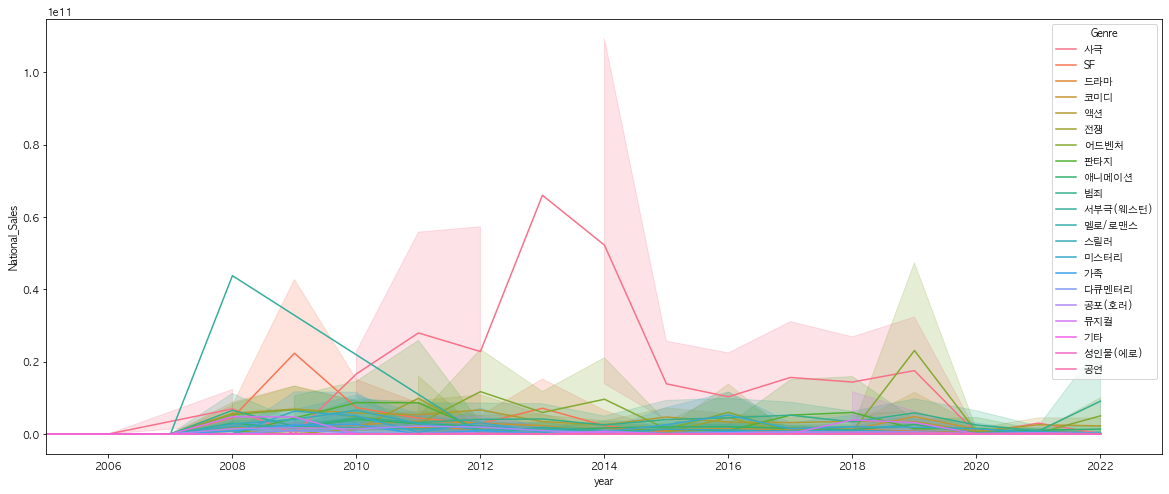

In [40]:

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data= data, x='year', y='National_Sales', hue='Genre')
plt.xlim([2005,2023])
plt.ylim()


In [42]:
data[data['year'] == 2014].National_Sales.describe()

count    1.095000e+03
mean     1.534787e+09
std      8.127790e+09
min      2.000000e+03
25%      2.700000e+05
50%      6.532200e+06
75%      8.906625e+07
max      1.357484e+11
Name: National_Sales, dtype: float64

In [25]:
# sns.stripplot(x='year', y ='Genre', data=data)